In [27]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as fdmp, seaborn as fdse
from sklearn import metrics, decomposition, utils, model_selection, pipeline,preprocessing, feature_selection
from sklearn import ensemble, linear_model, svm, neural_network, neighbors
import pickle

In [2]:
FDT=pandas.read_csv("Food_Time_Data_Set.csv")
FDT=FDT.drop("Unnamed: 14", axis=1)
FDT.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45


In [3]:
def FetFormulation(fooddf):
    TrArr=numpy.array(fooddf['TARGET'])
    new_arr = numpy.where(TrArr == '#VALUE!', numpy.nan, TrArr) 
    new_arr = numpy.where(new_arr == '#N/A', numpy.nan, new_arr) 
    fooddf['TARGET']=new_arr
    fooddf['TARGET']=numpy.array(fooddf['TARGET'],float)
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(fooddf.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(fooddf.isnull().sum())
    smfd=sum(fooddf.isnull().sum())
    if smfd>0:
        fdob=fooddf.dtypes[fooddf.dtypes=='object'].index.tolist()
        fdnm=fooddf.dtypes[fooddf.dtypes!='object'].index.tolist() 
        if sum(fooddf.isna().sum())!=0:
            for x in fdob:
                fooddf[x]=fooddf[x].fillna(fooddf[x].mode()[0])
            for y in fdnm:
                fooddf[y]=fooddf[y].fillna(fooddf[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(fooddf.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return fooddf
FDTMS=FetFormulation(FDT)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64

## EDA

In [4]:
FDTMS.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,14.292747,21.666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.170000,85.266667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.340000,28.583333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.050000,35.183333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.890000,43.450000


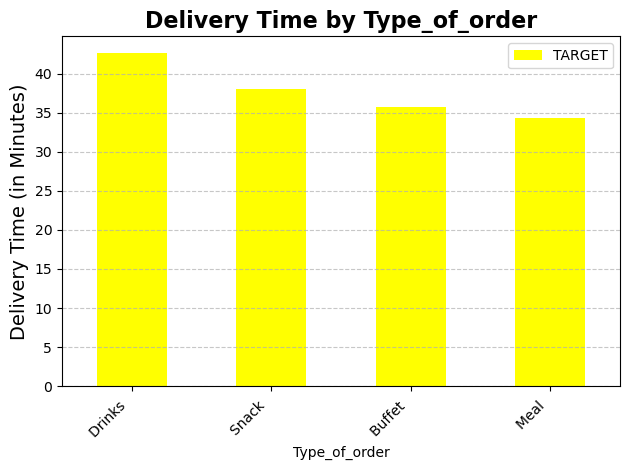

,TARGET
Type_of_order,
Drinks,42.630232
Snack,38.011945
Buffet,35.660937
Meal,34.272924


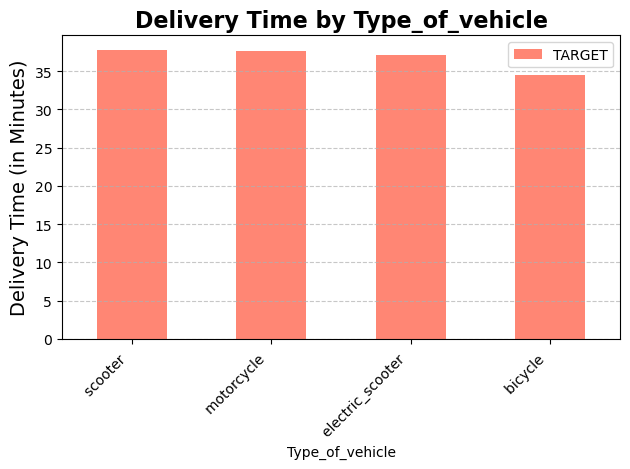

,TARGET
Type_of_vehicle,
scooter,37.805800
motorcycle,37.663809
electric_scooter,37.077795
bicycle,34.527541


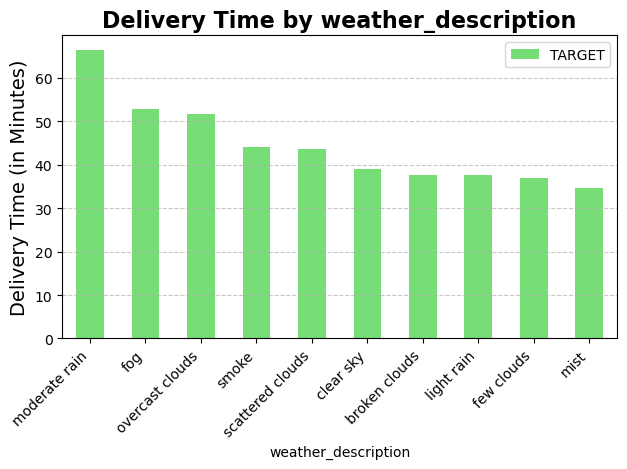

,TARGET
weather_description,
moderate rain,66.450000
fog,52.701020
overcast clouds,51.699677
smoke,44.119435
scattered clouds,43.676077
clear sky,39.087979
broken clouds,37.713559
light rain,37.656750
few clouds,36.987500


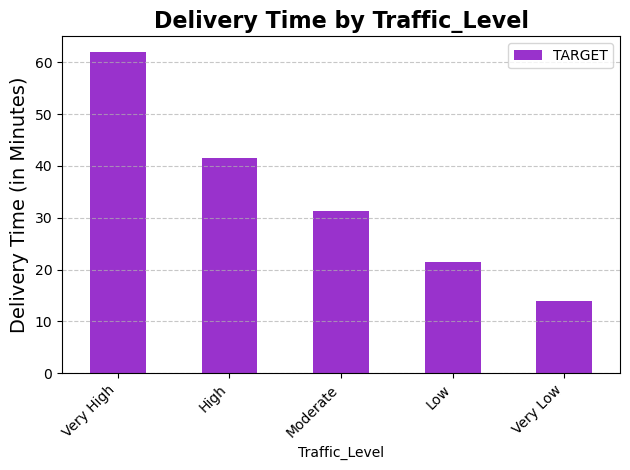

,TARGET
Traffic_Level,
Very High,61.929136
High,41.469617
Moderate,31.356593
Low,21.471835
Very Low,13.890849


In [5]:
fetssls=['Type_of_order','Type_of_vehicle','weather_description','Traffic_Level']
pltclrs=['#FFFF00','#FF8674','#77DD77','#9932CC']
for f in range(len(fetssls)):
    gbdt=FDTMS.groupby(fetssls[f])['TARGET'].mean().to_frame().sort_values(by=['TARGET'],ascending=False).head(10)
    gbdt.plot(kind='bar',color=pltclrs[f])
    fdmp.title('Delivery Time by {}'.format(fetssls[f]), fontsize=16, weight='bold')
    fdmp.ylabel('Delivery Time (in Minutes)', fontsize=14)
    fdmp.grid(True, axis='y', linestyle='--', alpha=0.7)
    fdmp.xticks(rotation=45, ha="right")
    fdmp.legend()
    fdmp.tight_layout()
    fdmp.show()
    display(HTML(gbdt.to_html()))

## Encoding Categorical Features

In [6]:
def DataEnc(fooddf):
    fooddf1=fooddf.copy()
    print("Feature Types Before Encoding")
    print(fooddf1.info())
    obfooddf=fooddf1.dtypes[fooddf1.dtypes=='object'].index.tolist()
    numfooddf=fooddf1.dtypes[fooddf1.dtypes!='object'].index.tolist()
    fooddf_objdf=fooddf1[obfooddf]
    fooddf_numdf=fooddf1[numfooddf]
    cols = fooddf_objdf.columns.tolist()
    fooddf_objdf[cols] = fooddf_objdf[cols].apply(preprocessing.LabelEncoder().fit_transform)
    fooddf1=pandas.concat([fooddf_numdf,fooddf_objdf],axis=1)
    if "Unnamed: 22" in fooddf1.columns:
        fooddf1=fooddf1.drop("Unnamed: 22",axis=1)
    print("Feature Types After Encoding")
    print(fooddf1.info())
    return fooddf1
FDT_encoded=DataEnc(FDT)
FDT_encoded.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10001 non-null  object 
 1   Delivery_person_ID           10001 non-null  object 
 2   Delivery_person_Age          10001 non-null  float64
 3   Delivery_person_Ratings      10001 non-null  float64
 4   Restaurant_latitude          10001 non-null  float64
 5   Restaurant_longitude         10001 non-null  float64
 6   Delivery_location_latitude   10001 non-null  float64
 7   Delivery_location_longitude  10001 non-null  float64
 8   Type_of_order                10001 non-null  object 
 9   Type_of_vehicle              10001 non-null  object 
 10  temperature                  10001 non-null  float64
 11  humidity                     10001 non-null  float64
 12  precipitation                10001 non-null 

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET,ID,Delivery_person_ID,Type_of_order,Type_of_vehicle,weather_description,Traffic_Level
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,17.11,77.0,0.0,14.292747,21.666667,2455,619,3,2,4,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,19.50,93.0,0.0,37.170000,85.266667,7651,224,3,3,6,3
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,20.45,91.0,0.0,3.340000,28.583333,3512,226,1,2,6,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,23.86,78.0,0.0,10.050000,35.183333,4882,385,0,2,6,2
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26.55,87.0,0.0,9.890000,43.450000,4395,321,3,3,6,0


## Detecting and Removing Outliers

[0.98459527 0.0152369 ]


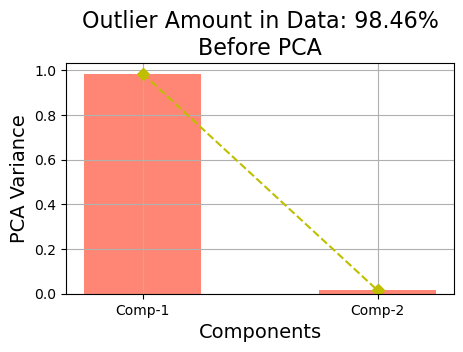

[0.2179706  0.19672633]


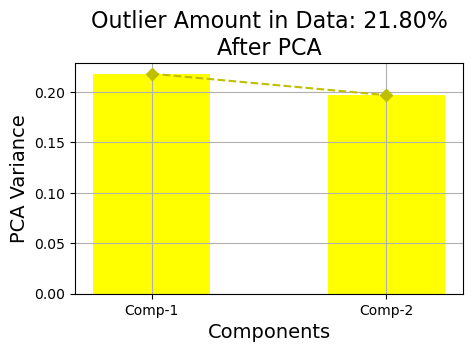

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),ID,Delivery_person_ID,Type_of_order,Type_of_vehicle,weather_description,Traffic_Level,TARGET
0,0.628571,0.78,0.867852,0.929061,0.732992,0.857137,0.464093,0.746269,0.0,0.218609,0.245647,0.482087,1.000000,0.666667,0.4,0.25,21.666667
1,0.542857,0.70,0.708801,0.939191,0.419824,0.878602,0.571364,0.985075,0.0,0.611083,0.765559,0.174455,1.000000,1.000000,0.6,0.75,85.266667
2,0.228571,0.68,0.708821,0.939164,0.415998,0.877192,0.614004,0.955224,0.0,0.030709,0.351411,0.176012,0.333333,0.666667,0.6,0.25,28.583333
3,0.657143,0.74,0.677914,0.935193,0.355742,0.869718,0.767056,0.761194,0.0,0.145823,0.488493,0.299844,0.000000,0.666667,0.6,0.50,35.183333
4,0.485714,0.72,0.709768,0.953710,0.418850,0.906571,0.887792,0.895522,0.0,0.143078,0.439764,0.250000,1.000000,1.000000,0.6,0.00,43.450000
5,0.200000,0.76,0.781898,0.943292,0.562158,0.885661,0.657989,0.567164,0.0,0.167267,0.650390,0.429128,0.000000,0.666667,0.0,0.50,30.600000
6,0.514286,0.74,0.877957,0.982501,0.756014,0.964839,0.482047,0.626866,0.0,0.301252,0.624675,0.893302,0.666667,1.000000,0.1,0.00,38.166667
7,0.571429,0.72,0.699726,0.933101,0.401753,0.866444,0.505386,0.820896,0.0,0.460799,0.662197,0.800623,0.666667,0.666667,0.9,0.75,50.000000
8,0.200000,0.76,0.781933,0.943170,0.565448,0.886546,0.642280,0.567164,0.0,0.515869,0.007004,0.419003,0.000000,0.666667,0.0,0.75,81.783333
9,0.600000,0.64,0.990519,0.941244,0.978866,0.882022,0.254488,0.746269,0.0,0.172242,0.892536,0.353583,1.000000,0.666667,0.1,0.00,36.366667


In [7]:
def OutVarSales(fooddf,v1, st):
    arrfooddf=numpy.array(fooddf.iloc[:,:-1])
    fooddfpca = decomposition.PCA(n_components=2)
    fooddfpca.fit(arrfooddf)
    explval=fooddfpca.explained_variance_ratio_
    valm=max(explval.tolist())
    valm=valm*100
    print(explval)
    cmp_fooddfpca=["Comp-{}".format(i+1) for i in range(len(explval.tolist()))]
    fdmp.figure(figsize=(5,3))
    valml="%.2f" % valm
    fdmp.title("Outlier Amount in Data: {}%\n{}".format(valml,st),fontsize=16)
    fdmp.bar(cmp_fooddfpca,explval.tolist(),width=0.5,color=v1)
    fdmp.plot(explval.tolist(),"--yD")
    fdmp.xlabel("Components",fontsize=14)
    fdmp.ylabel("PCA Variance",fontsize=14)
    fdmp.grid()
    fdmp.show()
    return explval
def DataSalScl(fooddf):
    SCLMM = preprocessing.MinMaxScaler()
    fooddfscl=SCLMM.fit_transform(fooddf)
    return fooddfscl


pcaval=[]
pcaval.append(OutVarSales(FDT_encoded.drop(['TARGET'],axis=1),'#FF8674',"Before PCA"))

Statval=[]
for vr in pcaval:
    for v in vr:
        if v>0.8:
            Statval.append(True)
if len(Statval)==1 and True in Statval:
    NormFd=DataSalScl(FDT_encoded.drop(['TARGET'],axis=1))
NormFd=pandas.DataFrame(NormFd,columns=FDT_encoded.drop(['TARGET'],axis=1).columns.tolist())
NormFd['TARGET']=FDT_encoded['TARGET'].tolist()
OutVarSales(NormFd.drop('TARGET',axis=1),'#FFFF00',"After PCA")
NormFd.head(10)

<Axes: >

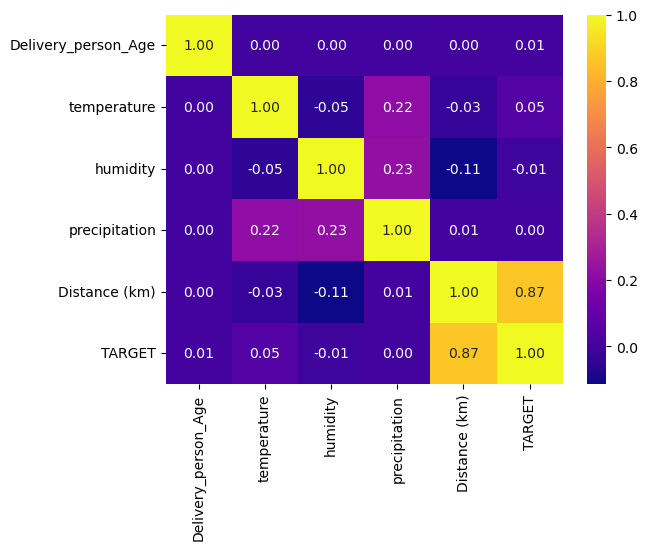

In [8]:
fetrel=['Delivery_person_Age','temperature','humidity','precipitation','Distance (km)','TARGET']
coreldf=NormFd[fetrel]
fdse.heatmap(coreldf.corr(),fmt="0.2f",cmap='plasma',annot=True)

## Feature Selection

In [9]:
def FeatureSelection(fooddf):   
    print("--------------------------------------------------------------")
    print("Feature Selection for the Data using Chi-Squred")
    print("--------------------------------------------------------------")
    DtX=fooddf.drop(['TARGET'],axis=1)   
    DtY=fooddf['TARGET'] 
    DtY=DtY.replace(DtY.unique(),[x for x in range(len(DtY.unique()))]) 
    ChFet=feature_selection.SelectKBest(feature_selection.chi2)
    ChFet.fit(DtX, DtY) 
    selex1=DtX.columns[ChFet.get_support()]
    print("Selected Features for the Data using Chi-Squred(Ex-1): \n",*DtX.columns[ChFet.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    print("\nTotal Features Selected using Chi-Squred (Ex-1): \n",len(DtX.columns[ChFet.get_support()]))
    print("--------------------------------------------------------------")
    chidf=pandas.DataFrame({"Features":DtX.columns,"Feature Score":ChFet.scores_})
    chidf=chidf.sort_values(by="Feature Score",ascending=False).reset_index(drop=True)
    selex2=chidf.iloc[:12].Features.tolist()
    print("--------------------------------------------------------------")
    print("Selected Features for the Data using Chi-Squred(Ex-2): \n",*selex2,sep="\n")
    print("--------------------------------------------------------------")
    print("\nTotal Features Selected using Chi-Squred (Ex-2): \n",len(selex2))
    print("--------------------------------------------------------------")
    chiselfets=[] 
    chiselfetsexcl=[]
    allfets=[]
    for s in selex2:   
        if s in selex1:   
            chiselfets.append(s) 
        elif s not in selex1:
            chiselfetsexcl.append(s)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(*chiselfetsexcl,sep=", ")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    chiselfets.extend(chiselfetsexcl)
    return chiselfets, chidf
fets, scrdf=FeatureSelection(NormFd)
print("======================================================")
print("\nTotal Selected Features by Chi-Squared: {}\n".format(len(fets)))
print(*fets, sep="\n")
print("======================================================")
scrdf

--------------------------------------------------------------
Feature Selection for the Data using Chi-Squred
--------------------------------------------------------------
Selected Features for the Data using Chi-Squred(Ex-1): 

Delivery_location_latitude
Delivery_location_longitude
humidity
precipitation
Distance (km)
ID
Delivery_person_ID
Type_of_order
weather_description
Traffic_Level
--------------------------------------------------------------

Total Features Selected using Chi-Squred (Ex-1): 
 10
--------------------------------------------------------------
--------------------------------------------------------------
Selected Features for the Data using Chi-Squred(Ex-2): 

Traffic_Level
precipitation
Type_of_order
weather_description
Distance (km)
Delivery_location_latitude
Delivery_location_longitude
ID
Delivery_person_ID
humidity
Delivery_person_Age
Type_of_vehicle
--------------------------------------------------------------

Total Features Selected using Chi-Squred (Ex

,Features,Feature Score
0,Traffic_Level,2231.468931
1,precipitation,1098.542417
2,Type_of_order,936.943643
3,weather_description,826.554563
4,Distance (km),735.950118
5,Delivery_location_latitude,595.747369
6,Delivery_location_longitude,572.951244
7,ID,562.793368
8,Delivery_person_ID,466.199027
9,humidity,409.816925


In [10]:
PredData=NormFd[fets]
PredData

,Traffic_Level,precipitation,Type_of_order,weather_description,Distance (km),Delivery_location_latitude,Delivery_location_longitude,ID,Delivery_person_ID,humidity,Delivery_person_Age,Type_of_vehicle
0,0.25,0.000000,1.000000,0.4,0.218609,0.732992,0.857137,0.245647,0.482087,0.746269,0.628571,0.666667
1,0.75,0.000000,1.000000,0.6,0.611083,0.419824,0.878602,0.765559,0.174455,0.985075,0.542857,1.000000
2,0.25,0.000000,0.333333,0.6,0.030709,0.415998,0.877192,0.351411,0.176012,0.955224,0.228571,0.666667
3,0.50,0.000000,0.000000,0.6,0.145823,0.355742,0.869718,0.488493,0.299844,0.761194,0.657143,0.666667
4,0.00,0.000000,1.000000,0.6,0.143078,0.418850,0.906571,0.439764,0.250000,0.895522,0.485714,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.00,0.000000,0.666667,0.4,0.297993,0.721241,0.827059,0.011107,0.983645,0.552239,0.485714,0.666667
9997,0.25,0.000000,0.666667,0.4,0.018700,0.563174,0.887059,0.533720,0.450935,0.492537,0.600000,0.666667
9998,0.75,0.000000,0.000000,0.1,0.467490,0.871149,0.856916,0.163798,0.541277,0.059701,0.628571,1.000000
9999,0.00,0.000000,0.666667,1.0,0.275862,0.614425,0.823294,0.214629,0.745327,0.447761,0.400000,1.000000


In [11]:
TargData=NormFd['TARGET']
TargData

0        21.666667
1        85.266667
2        28.583333
3        35.183333
4        43.450000
           ...    
9996     32.616667
9997     12.016667
9998     51.066667
9999     43.800000
10000    37.656750
Name: TARGET, Length: 10001, dtype: float64

In [14]:
def SplitData(fdpr,fdtr):
    TrFdX,TsFdX,TrFdy,TsFdy=model_selection.train_test_split(fdpr,fdtr, test_size=0.25, random_state=10)
    return TrFdX,TsFdX,TrFdy,TsFdy

TrFdX,TsFdX,TrFdy,TsFdy=SplitData(PredData,TargData)
print("Instances Present in Training Segment: {}".format(len(TrFdX)))
print("Instances Present in Test Segment: {}".format(len(TsFdX)))

Instances Present in Training Segment: 7500
Instances Present in Test Segment: 2501


In [28]:
FdRegMdl=[
    linear_model.SGDRegressor(),
    ensemble.RandomForestRegressor(),
    svm.SVR(),
    neural_network.MLPRegressor(),
    neighbors.KNeighborsRegressor()
]
FdRegs=[
    "Scholastic Gradient Descent",
    "Random Forest",
    "Support Vector Regression",
    "Neural Network",
    "KNN Regression"
]

SAVFilesAll=os.listdir(os.getcwd())
bstscr, prmsopt, time_optim=[],[], []
MdStrList=['MdEGD.sav','MdRFR.sav','MdSVR.sav','MdMLP.sav','MdKNN.sav']
if 'MdEGD.sav' in SAVFilesAll and 'MdRFR.sav' in SAVFilesAll and 'MdSVR.sav' in SAVFilesAll and 'MdMLP.sav' in SAVFilesAll and 'MdKNN.sav' in SAVFilesAll:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("     Models Present in Directory (Optimized Earlier)")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    for x in range(len(MdStrList)):
        FdRegMdl.append(pickle.load(open(MdStrList[x], 'rb')))
    print(*FdRegMdl, sep="\n")
else:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("     Models Not Present in Directory (Optimization Required)")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    regsopts=[
        [{"tol":[0.01,0.001,0.0001,0.00001],"max_iter":[800,1000],'alpha':[0.01,0.001,0.0001,0.00001]}],
        [{"n_estimators":[80,100],"criterion":['squared_error', 'absolute_error', 'friedman_mse'],"max_features":['sqrt', 'log2']}],
        [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'],"tol":[0.01,0.001,0.0001]}],
        [{"hidden_layer_sizes":[(70,),(80,),(100,)],'activation':['identity', 'logistic', 'tanh', 'relu'],"max_iter":[150,200]}],
        [{"n_neighbors":[4,5,6],'weights':['uniform', 'distance'],"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}]
    ]

    for fr in range(len(FdRegMdl)):
        tunetime=[]
        tunetime.append(datetime.datetime.now())
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print("              Optimizing {}".format(FdRegs[fr]))
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        CVFD = model_selection.GridSearchCV(FdRegMdl[fr], regsopts[fr], cv = 5, scoring='r2')
        CVFD.fit(PredData, TargData)
        FdRegMdl[fr]=CVFD.best_estimator_
        bstscr.append(CVFD.best_score_)
        prmsopt.append(CVFD.best_estimator_)
        tunetime.append(datetime.datetime.now())
        delta = tunetime[1] - tunetime[0]
        rqtimesec=delta.total_seconds()
        time_optim.append(rqtimesec)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print("Optimization Time for '{}': {} Seconds".format(FdRegs[fr],rqtimesec))
        print("{} Optimization Complete".format(FdRegs[fr]))
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    for frm in range(len(FdRegMdl)):
        pickle.dump(FdRegMdl[frm], open(MdStrList[frm], 'wb'))
    print(*FdRegMdl, sep="\n")
FdRegMdl

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
     Models Not Present in Directory (Optimization Required)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Optimizing Scholastic Gradient Descent
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Optimization Time for 'Scholastic Gradient Descent': 6.128911 Seconds
Scholastic Gradient Descent Optimization Complete
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Optimizing Random Forest
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Optimization Time for 'Random Forest': 637.292009 Seconds
Random Forest Optimization Complete
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

[SGDRegressor(alpha=1e-05, tol=0.01),
 RandomForestRegressor(criterion='friedman_mse', max_features='log2'),
 SVR(kernel='poly', tol=0.01),
 MLPRegressor(),
 KNeighborsRegressor(n_neighbors=6, weights='distance')]

In [31]:
if "OptParameters.csv" not in os.listdir():
    FdOptMdlDf=pandas.DataFrame({"Regressor":FdRegs,"Structure":prmsopt,"Score":numpy.array(bstscr)*100, 'OptTime':time_optim})
    FdOptMdlDf.to_csv("OptParameters.csv")
else:
    FdOptMdlDf=pandas.read_csv("OptParameters.csv")
    FdOptMdlDf=FdOptMdlDf.drop('Unnamed: 0',axis=1)
FdOptMdlDf

,Regressor,Structure,Score,OptTime
0,Scholastic Gradient Descent,"SGDRegressor(alpha=1e-05, tol=0.01)",76.534031,6.128911
1,Random Forest,(DecisionTreeRegressor(criterion='friedman_mse...,93.530007,637.292009
2,Support Vector Regression,"SVR(kernel='poly', tol=0.01)",83.302112,318.254978
3,Neural Network,MLPRegressor(),81.444711,380.132747
4,KNN Regression,"KNeighborsRegressor(n_neighbors=6, weights='di...",86.550633,9.656268


In [80]:
MdlsFd=[
    linear_model.SGDRegressor(),
    ensemble.RandomForestRegressor(),
    svm.SVR(),
    neural_network.MLPRegressor(),
    neighbors.KNeighborsRegressor()
]
MetaFD=ensemble.StackingRegressor(estimators=[('M1', FdRegMdl[1]), ('M2', FdRegMdl[4])],
                                     final_estimator=FdRegMdl[1],passthrough=True)

print(MetaFD)
if 'MetaLearning' not in FdRegs: 
    MdlsFd.append(MetaFD) 
    FdRegs.append('MetaLearning') 
else:
    MdlsFd=MdlsFd[:5]
    FdRegs=FdRegs[:5]
    MdlsFd.append(MetaFD) 
    FdRegs.append('MetaLearning') 
print(*MdlsFd, sep="\n")

StackingRegressor(estimators=[('M1',
                               RandomForestRegressor(criterion='friedman_mse',
                                                     max_features='log2')),
                              ('M2',
                               KNeighborsRegressor(n_neighbors=6,
                                                   weights='distance'))],
                  final_estimator=RandomForestRegressor(criterion='friedman_mse',
                                                        max_features='log2'),
                  passthrough=True)
SGDRegressor()
RandomForestRegressor()
SVR()
MLPRegressor()
KNeighborsRegressor()
StackingRegressor(estimators=[('M1',
                               RandomForestRegressor(criterion='friedman_mse',
                                                     max_features='log2')),
                              ('M2',
                               KNeighborsRegressor(n_neighbors=6,
                                                   weights

In [81]:
def PredFoodDelTime(mdlrg, XSLTR, XSLTS, YSLTR, YSLTS):
    rgfdexe=mdlrg
    rgfdexe.fit(XSLTR, YSLTR)
    FdTsPrd=rgfdexe.predict(XSLTS)
    FdTsPrd_tr=rgfdexe.predict(XSLTR)
    mse=metrics.mean_squared_error(YSLTS,FdTsPrd)
    r2nf=round(metrics.r2_score(YSLTS,FdTsPrd),4)*100
    r2nftr=round(metrics.r2_score(YSLTR,FdTsPrd_tr),4)*100
    mapenf=metrics.mean_absolute_percentage_error(YSLTS,FdTsPrd)
    return r2nf,r2nftr,mse,mapenf

In [82]:
ListFDVals=[[],[],[],[],[],[]]
for i in range(len(FdRegMdl)):
    Strt_T = datetime.datetime.now() 
    print("Executing {}".format(FdRegs[i]))
    FdPredVals=PredFoodDelTime(MdlsFd[i], TrFdX, TsFdX, TrFdy, TsFdy)
    ListFDVals[0].append(FdPredVals[0])
    ListFDVals[1].append(FdPredVals[1])
    ListFDVals[2].append(FdPredVals[2])
    ListFDVals[3].append(FdPredVals[3])
    EndT = datetime.datetime.now()
    DfTime = EndT-Strt_T
    TimeSec=DfTime.total_seconds()
    ListFDVals[4].append(round(TimeSec,3))
    print("Elasped Time: {} Seconds".format(round(TimeSec,3)))
    print("______________________________________")

Executing Scholastic Gradient Descent
Elasped Time: 0.043 Seconds
______________________________________
Executing Random Forest
Elasped Time: 3.777 Seconds
______________________________________
Executing Support Vector Regression
Elasped Time: 7.013 Seconds
______________________________________
Executing Neural Network
Elasped Time: 3.716 Seconds
______________________________________
Executing KNN Regression
Elasped Time: 0.306 Seconds
______________________________________
Executing MetaLearning
Elasped Time: 8.606 Seconds
______________________________________


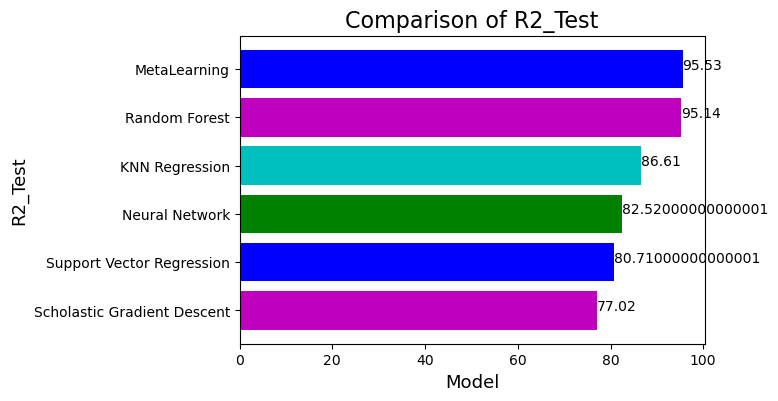

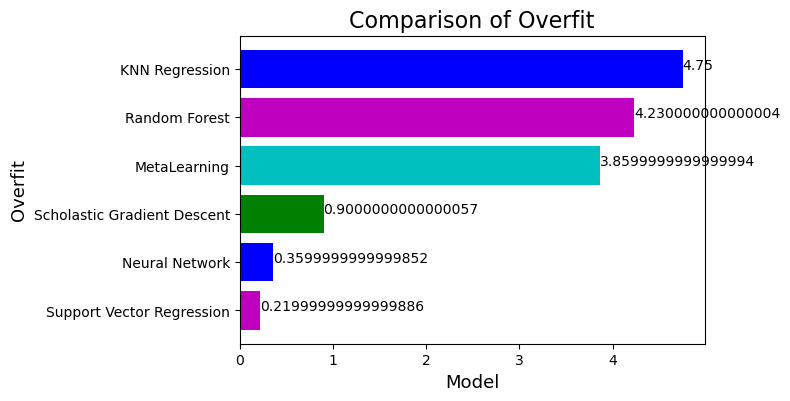

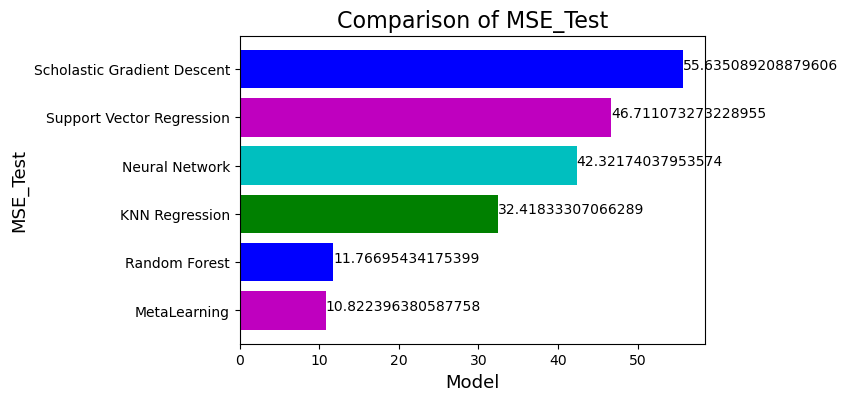

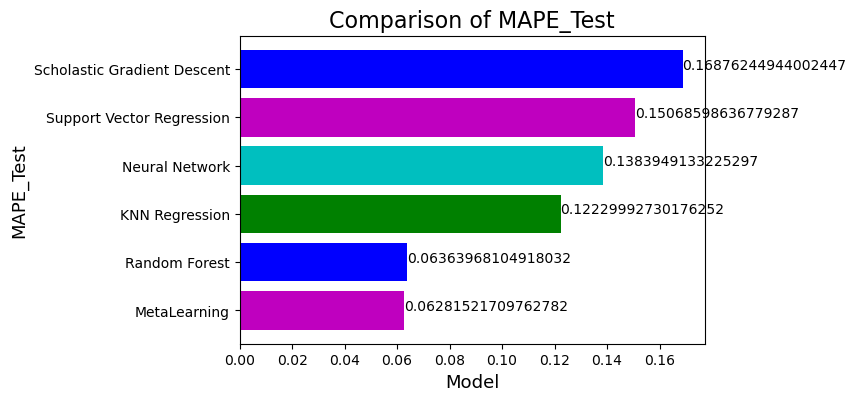

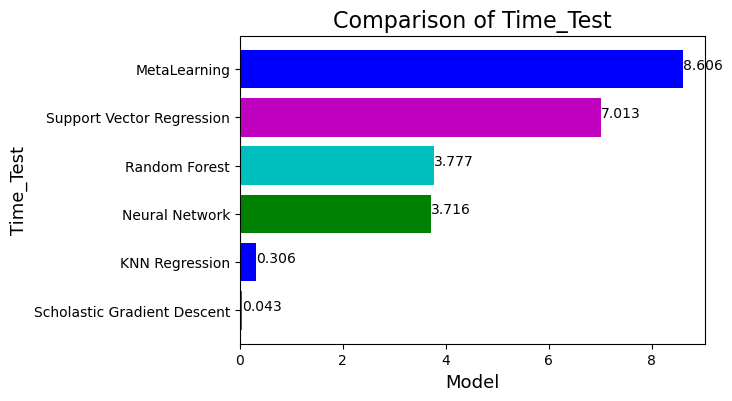

,Model,R2_Train,R2_Test,Overfit,MSE_Test,MAPE_Test,Time_Test
0,MetaLearning,99.39,95.53,3.86,10.822396,0.062815,8.606
1,Random Forest,99.37,95.14,4.23,11.766954,0.063640,3.777
2,KNN Regression,91.36,86.61,4.75,32.418333,0.122300,0.306
3,Neural Network,82.88,82.52,0.36,42.321740,0.138395,3.716
4,Support Vector Regression,80.93,80.71,0.22,46.711073,0.150686,7.013
5,Scholastic Gradient Descent,77.92,77.02,0.90,55.635089,0.168762,0.043


In [83]:
FdResData=pandas.DataFrame({
    "Model":FdRegs,
    "R2_Train":ListFDVals[1],
    "R2_Test":ListFDVals[0],
    "Overfit": numpy.array(ListFDVals[1])-numpy.array(ListFDVals[0]),
    "MSE_Test":ListFDVals[2],
    "MAPE_Test":ListFDVals[3],
    "Time_Test":ListFDVals[4]
})
FdResData

clnf_all_lst=FdResData.columns.tolist()[2:]
for i in clnf_all_lst:
    FdResData=FdResData.sort_values(by=i,ascending=True)
    fdmp.figure(figsize=(6,4))
    fdmp.title("Comparison of {}".format(i),fontsize=16)
    fdmp.barh(FdResData['Model'],FdResData[i],color=["m","b","g","c"])
    fdmp.xlabel("Model",fontsize=13)
    fdmp.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(FdResData[i]):
        fdmp.text(vlgl, gid, str(vlgl))
    fdmp.show()
FdResData=FdResData.sort_values(by='R2_Test',ascending=False).reset_index(drop=True)
FdResData.to_csv("Result_Food_Deliv_Time.csv")
FdResData

In [84]:
MdlsFd[-1]

StackingRegressor(estimators=[('M1',
                               RandomForestRegressor(criterion='friedman_mse',
                                                     max_features='log2')),
                              ('M2',
                               KNeighborsRegressor(n_neighbors=6,
                                                   weights='distance'))],
                  final_estimator=RandomForestRegressor(criterion='friedman_mse',
                                                        max_features='log2'),
                  passthrough=True)